In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = '/content/drive/MyDrive/MELBOURNE_HOUSE_PRICES_LESS.csv'
df = pd.read_csv(file_path)

# Show first 5 rows
display(
    df.head()
      .style.set_caption("First 5 rows ")
      .set_table_attributes("style='display:inline;border:1px solid black;border-collapse:collapse;'")
      .set_properties(**{"border": "1px solid black", "padding": "5px"})
)



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.000000,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.000000,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.000000,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.000000,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.000000,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.000000,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.000000,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.500000,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.000000,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.400000,Moonee Valley City Council


In [15]:
import pandas as pd
from IPython.display import display

# Dataset dimensions in a table
dims = pd.DataFrame({
    "Metric": ["Rows", "Columns"],
    "Count": [df.shape[0], df.shape[1]]
})
display(dims.style.set_caption("Dataset Dimensions"))

# Dataset info in a table
info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
    "Dtype": df.dtypes.values
})
display(info.style.set_caption("DataFrame Info"))


,Metric,Count
0,Rows,63023
1,Columns,13


,Column,Non-Null Count,Null Count,Dtype
0,Suburb,63023,0,object
1,Address,63023,0,object
2,Rooms,63023,0,int64
3,Type,63023,0,object
4,Price,48433,14590,float64
5,Method,63023,0,object
6,SellerG,63023,0,object
7,Date,63023,0,object
8,Postcode,63023,0,int64
9,Regionname,63023,0,object


In [17]:
# Summary statistics for numerical columns in table format
summary_stats = df.describe().T  # transpose so columns are listed vertically
display(
    summary_stats
      .style.set_caption("Summary Statistics")
      .set_table_attributes("style='display:inline;border:1px solid black;border-collapse:collapse;'")
      .set_properties(**{"border": "1px solid black", "padding": "5px"})
)


,count,mean,std,min,25%,50%,75%,max
Rooms,63023.000000,3.110595,0.957551,1.000000,3.000000,3.000000,4.000000,31.000000
Price,48433.000000,997898.241488,593498.919037,85000.000000,620000.000000,830000.000000,1220000.000000,11200000.000000
Postcode,63023.000000,3125.673897,125.626877,3000.000000,3056.000000,3107.000000,3163.000000,3980.000000
Propertycount,63023.000000,7617.728131,4424.423167,39.000000,4380.000000,6795.000000,10412.000000,21650.000000
Distance,63023.000000,12.684829,7.592015,0.000000,7.000000,11.400000,16.700000,64.100000


In [18]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:")
print(missing_percentage)

# Drop columns with more than 40% missing values
cols_to_drop = missing_percentage[missing_percentage > 40].keys()
df_cleaned = df.drop(columns=cols_to_drop)

print(f"\nDropped columns: {list(cols_to_drop)}")
print(f"New shape of the dataframe: {df_cleaned.shape}")

# Drop rows where the 'Price' is missing
df_cleaned.dropna(subset=['Price'], inplace=True)
print(f"\nShape after dropping rows with missing Price: {df_cleaned.shape}")

# Impute numerical columns with the median
for col in ['Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude']:
    if col in df_cleaned.columns:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

# Impute categorical columns with the mode
for col in ['CouncilArea', 'Regionname']:
     if col in df_cleaned.columns:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_val, inplace=True)

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())

Percentage of missing values:
Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            23.150278
Method            0.000000
SellerG           0.000000
Date              0.000000
Postcode          0.000000
Regionname        0.000000
Propertycount     0.000000
Distance          0.000000
CouncilArea       0.000000
dtype: float64

Dropped columns: []
New shape of the dataframe: (63023, 13)

Shape after dropping rows with missing Price: (48433, 13)

Missing values after imputation:
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


/tmp/ipython-input-1176746466.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_val, inplace=True)


In [19]:
# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')

# Convert columns that should be integers
for col in ['Bathroom', 'Car', 'Postcode', 'Propertycount']:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype(int)

# Verify the changes
print("\nData types after correction:")
df_cleaned.info()


Data types after correction:
<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         48433 non-null  object        
 1   Address        48433 non-null  object        
 2   Rooms          48433 non-null  int64         
 3   Type           48433 non-null  object        
 4   Price          48433 non-null  float64       
 5   Method         48433 non-null  object        
 6   SellerG        48433 non-null  object        
 7   Date           48433 non-null  datetime64[ns]
 8   Postcode       48433 non-null  int64         
 9   Regionname     48433 non-null  object        
 10  Propertycount  48433 non-null  int64         
 11  Distance       48433 non-null  float64       
 12  CouncilArea    48433 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 5.2+ MB


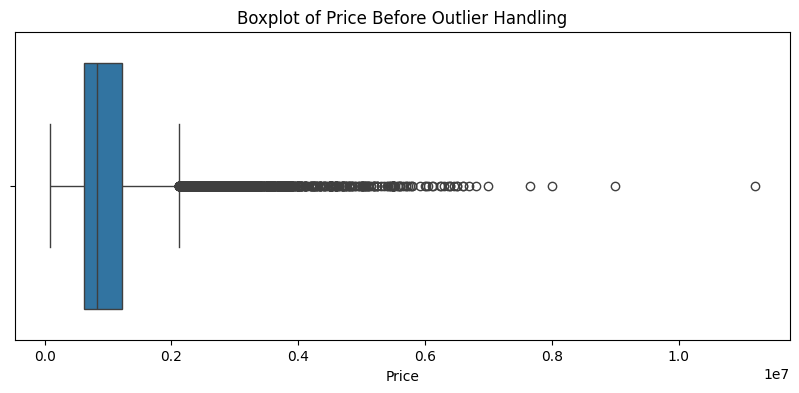

In [21]:
# Visualize outliers with a boxplot for 'Price'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price Before Outlier Handling')
plt.show()


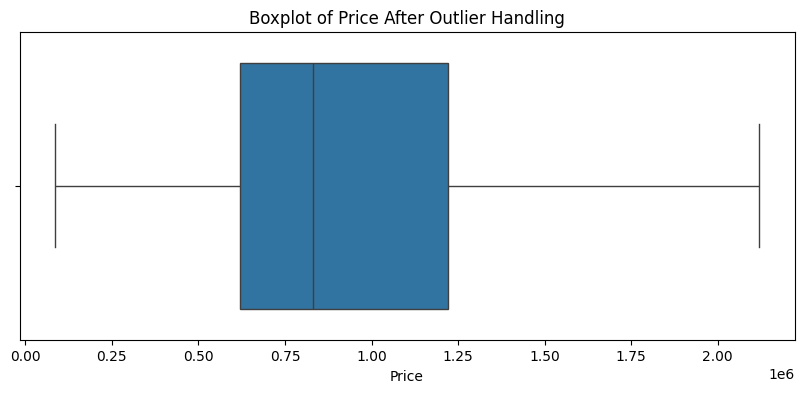

In [23]:
# List of columns we want to handle outliers for
target_cols = ['Landsize', 'Price']

for col in target_cols:
    if col in df_cleaned.columns:   # Only process if column exists
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping the outliers
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound,
                               np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col]))

        # Visualize after capping
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot of {col} After Outlier Handling')
        plt.show()
